# Extracting Tesla Stock Data Using yfinance

In [1]:
import yfinance as yf
import pandas as pd

In [2]:
tesla = yf.Ticker("TSLA")

In [3]:
tesla_df = tesla.history(period = "max", interval = "1d")

In [4]:
tesla_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [5]:
tesla_df.reset_index(drop = False, inplace = True)

# Extracting Tesla Revenue Data Using Webscraping

In [6]:
import requests
from bs4 import BeautifulSoup

In [7]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [8]:
data  = requests.get(url).text

In [9]:
soup = BeautifulSoup(data, 'html5lib')

In [10]:
dataDict = {}
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    dataDict[col[0].text] = col[1].text

In [11]:
dataDict

{'2021': '$53,823',
 '2020': '$31,536',
 '2019': '$24,578',
 '2018': '$21,461',
 '2017': '$11,759',
 '2016': '$7,000',
 '2015': '$4,046',
 '2014': '$3,198',
 '2013': '$2,013',
 '2012': '$413',
 '2011': '$204',
 '2010': '$117',
 '2009': '$112'}

In [12]:
tsla = pd.DataFrame(index = dataDict.keys(), data = dataDict.values())

In [13]:
tsla.reset_index(inplace = True, drop = False)

In [14]:
tsla.rename(columns = {"index":"Year",0:"Revenue"}, inplace = True)

In [15]:
for i in tsla.index:
    tsla.loc[i,"Revenue"] = tsla.loc[i,"Revenue"].replace("$","")
    tsla.loc[i,"Revenue"] = int(tsla.loc[i,"Revenue"].replace(",",""))

In [16]:
tsla

,Year,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759
5,2016,7000
6,2015,4046
7,2014,3198
8,2013,2013
9,2012,413


# Extracting GameStop Stock Data Using yfinance

In [17]:
game = yf.Ticker("GME")

In [18]:
game_df = game.history(period = "max", interval = "1d")

In [19]:
game_df.reset_index(drop = False, inplace = True)

In [20]:
game_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607505,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Extracting GameStop Revenue Data Using Webscraping 

In [21]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [22]:
data  = requests.get(url).text

In [23]:
soup = BeautifulSoup(data, 'html5lib')

In [24]:
dataDict = {}
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    dataDict[col[0].text] = col[1].text

In [25]:
gme = pd.DataFrame(index = dataDict.keys(), data = dataDict.values())

In [26]:
gme.reset_index(inplace = True, drop = False)

In [27]:
gme.rename(columns = {"index":"Year",0:"Revenue"}, inplace = True)

In [28]:
for i in gme.index:
    gme.loc[i,"Revenue"] = gme.loc[i,"Revenue"].replace("$","")
    gme.loc[i,"Revenue"] = int(gme.loc[i,"Revenue"].replace(",",""))

In [29]:
gme.head()

,Year,Revenue
0,2020,6466
1,2019,8285
2,2018,8547
3,2017,7965
4,2016,9364


# Tesla Stock and Revenue Dashboard

<Axes: title={'center': 'TESLA'}, xlabel='Date'>

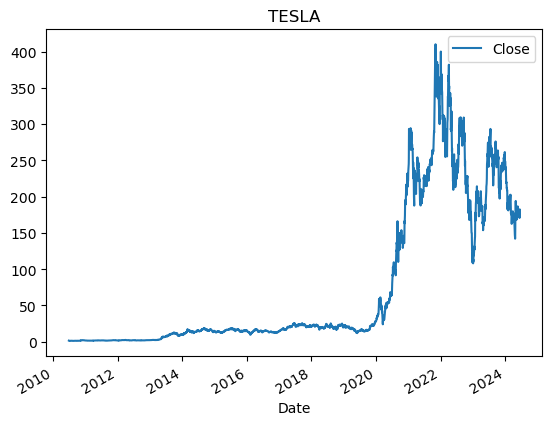

In [30]:
tesla_df.plot(kind = "line", x="Date",y="Close",title = "Tesla")

<Axes: title={'center': 'Tesla revenue (M$)'}, xlabel='Year'>

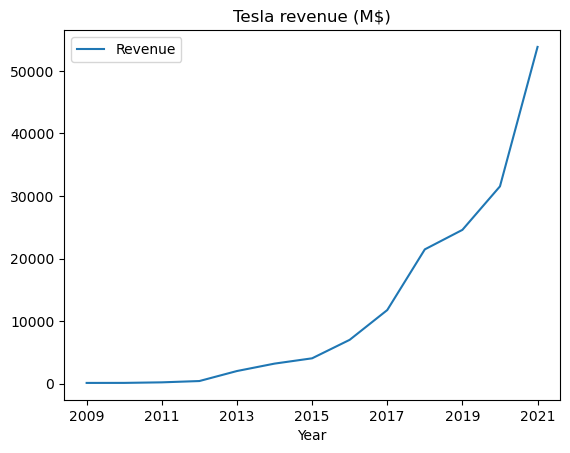

In [36]:
tsla.sort_values(by="Year").plot(kind="line", x="Year",y="Revenue", title = "Tesla revenue (M$)")

# GameStop Stock and Revenue Dashboard

<Axes: title={'center': 'GAMESTOP'}, xlabel='Date'>

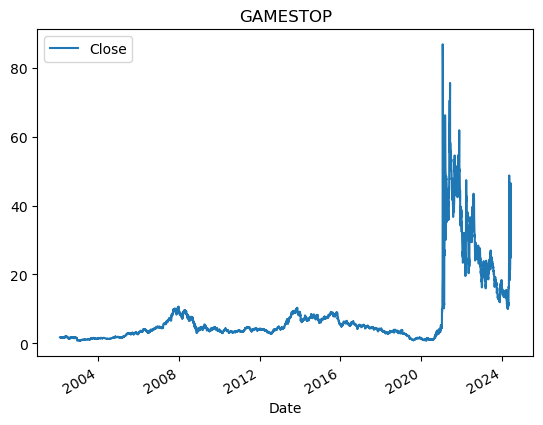

In [35]:
game_df.plot(kind = "line", x="Date",y="Close",title = "Gamestop")

<Axes: xlabel='Year'>

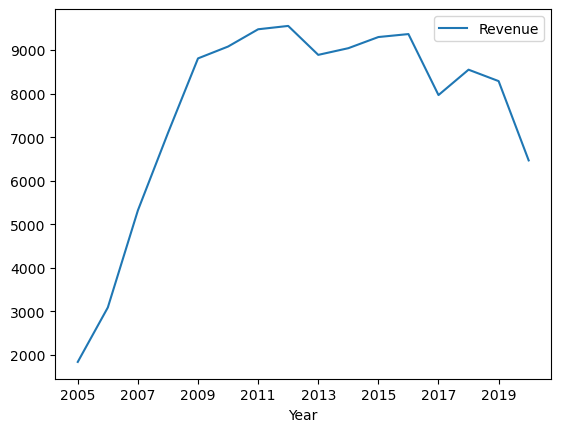

In [34]:
gme.sort_values(by="Year").plot(kind="line", x = "Year", y= "Revenue", title = "GameStop revenue (M$)")